In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('D:\\Data_sets\\time_series\\ice_cream.csv')
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [5]:
df.rename(columns={'DATE': 'date', 'IPN31152N': 'units'}, inplace=True)

In [6]:
#convert date column to datetime type
df['date'] = pd.to_datetime(df.date)

In [7]:
#set date as index
df.set_index('date', inplace=True)

In [8]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df = df[start_date:]

In [9]:
df.head()

,units
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


Text(0, 0.5, 'Production')

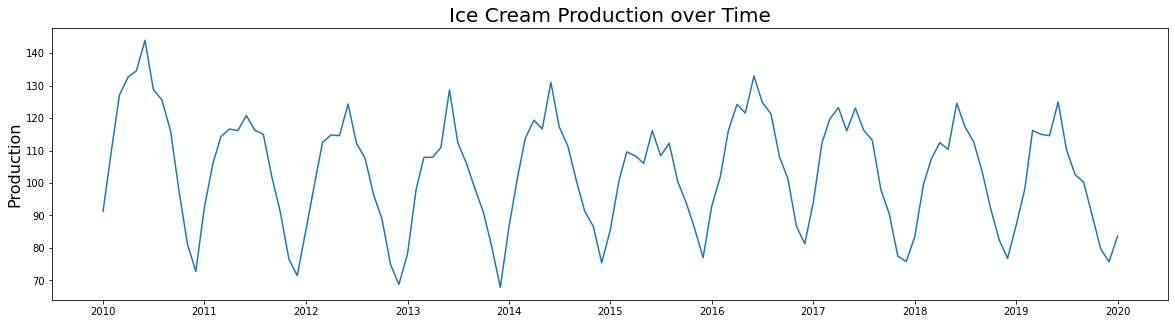

In [10]:
plt.plot(df)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## ACF

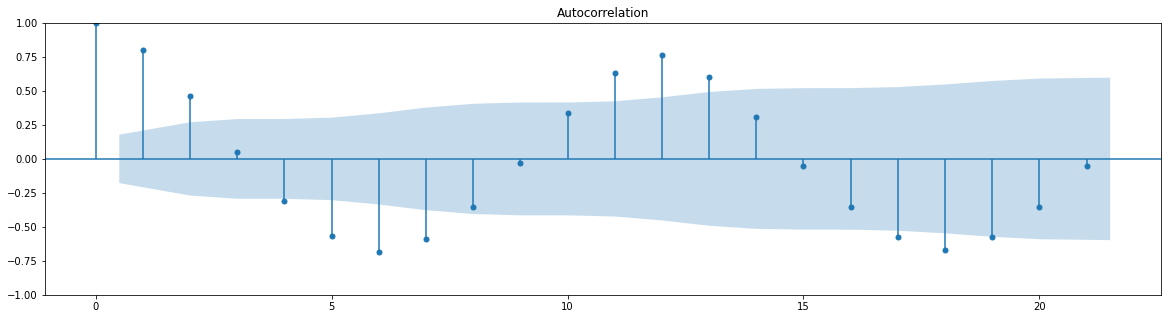

In [14]:
plot_acf(df)
plt.show()

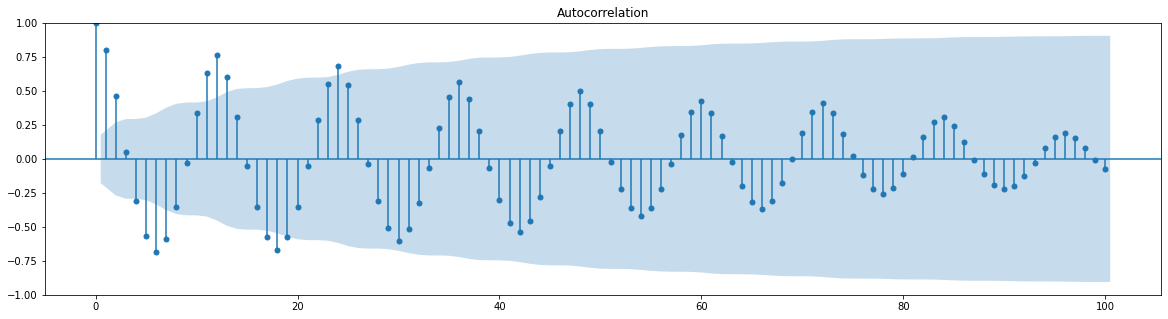

In [15]:
plot_acf(df, lags=100)
plt.show()

## PACF

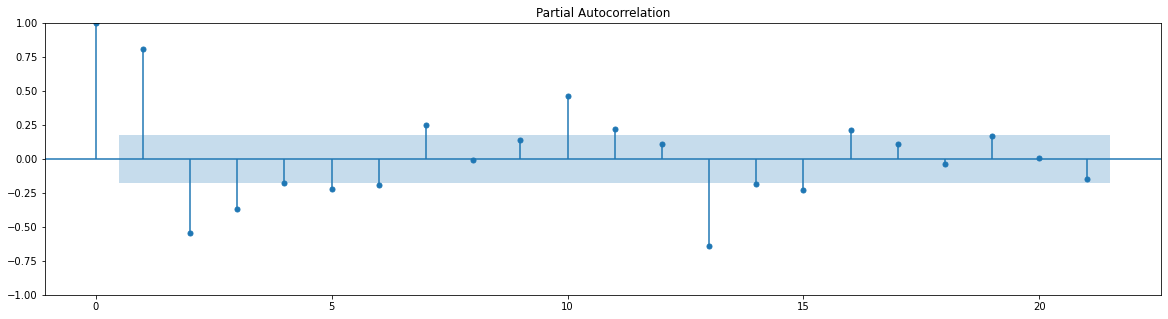

In [16]:
plot_pacf(df)
plt.show()

In [17]:
## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

## Now look at Stock data

In [41]:
import yfinance as yf

In [42]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [43]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [44]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [45]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,183.231536,183.407726,180.941027,181.073166,130333800,0.0,0
2015-01-02,181.813168,182.253649,179.875038,180.976242,121465900,0.0,0
2015-01-05,179.866212,180.042402,177.381903,177.707855,169632600,0.0,0
2015-01-06,178.033803,178.588814,175.188297,176.034027,209151400,0.0,0
2015-01-07,177.443559,178.588813,176.967845,178.227615,125346700,0.0,0
...,...,...,...,...,...,...,...
2019-12-24,312.519563,312.568159,311.965426,312.286255,20270000,0.0,0
2019-12-26,312.694547,313.958370,312.684846,313.948639,30911200,0.0,0
2019-12-27,314.726292,314.784619,313.306950,313.870789,42528800,0.0,0


In [46]:
tickerDf = tickerDf[['Close']]

In [47]:
tickerDf

,Close
Date,
2014-12-31,181.073166
2015-01-02,180.976242
2015-01-05,177.707855
2015-01-06,176.034027
2015-01-07,178.227615
...,...
2019-12-24,312.286255
2019-12-26,313.948639
2019-12-27,313.870789


Text(0, 0.5, 'Price')

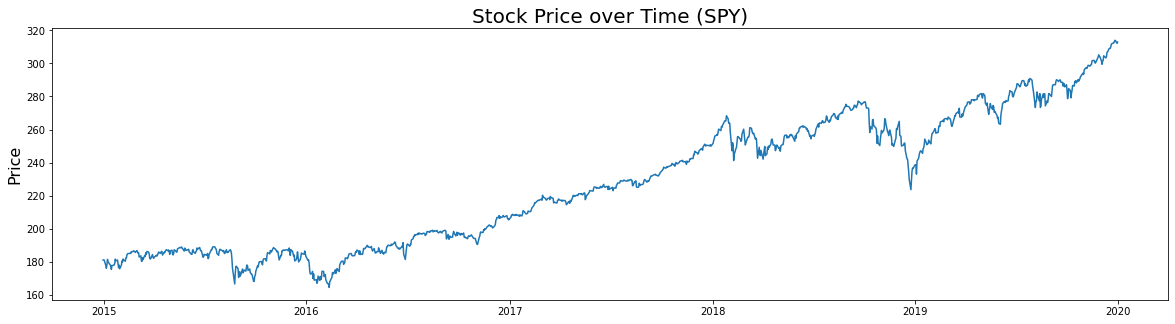

In [48]:
plt.plot(tickerDf)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)

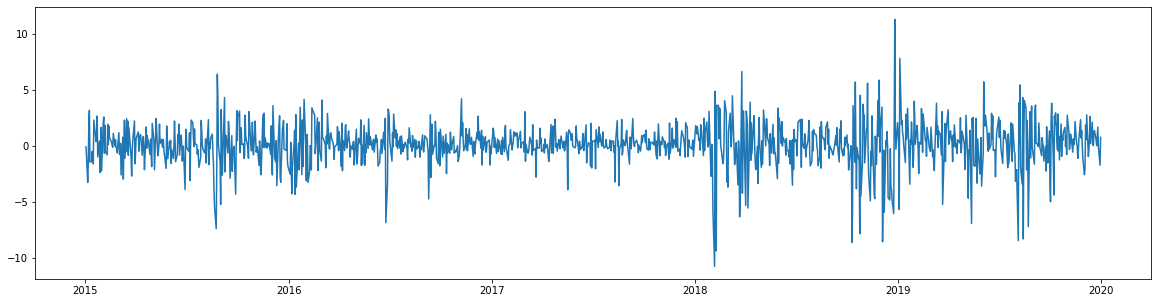

In [49]:
ts_diff = tickerDf - tickerDf.shift()
plt.plot(ts_diff)

In [50]:
ts_diff

,Close
Date,
2014-12-31,NaN
2015-01-02,-0.096924
2015-01-05,-3.268387
2015-01-06,-1.673828
2015-01-07,2.193588
...,...
2019-12-24,0.009735
2019-12-26,1.662384
2019-12-27,-0.077850


In [51]:
ts_diff.dropna(inplace=True)

In [52]:
ts_diff

,Close
Date,
2015-01-02,-0.096924
2015-01-05,-3.268387
2015-01-06,-1.673828
2015-01-07,2.193588
2015-01-08,3.162643
...,...
2019-12-24,0.009735
2019-12-26,1.662384
2019-12-27,-0.077850


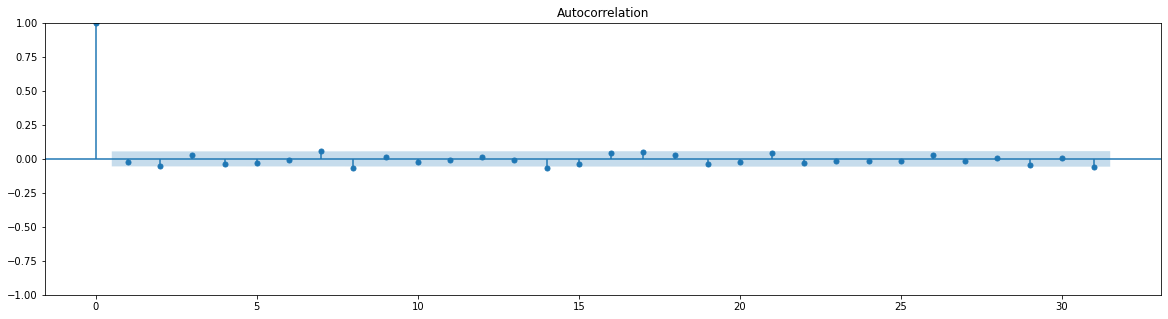

In [53]:
plot_acf(ts_diff)
plt.show()

In [54]:
## here we can't able to find lag

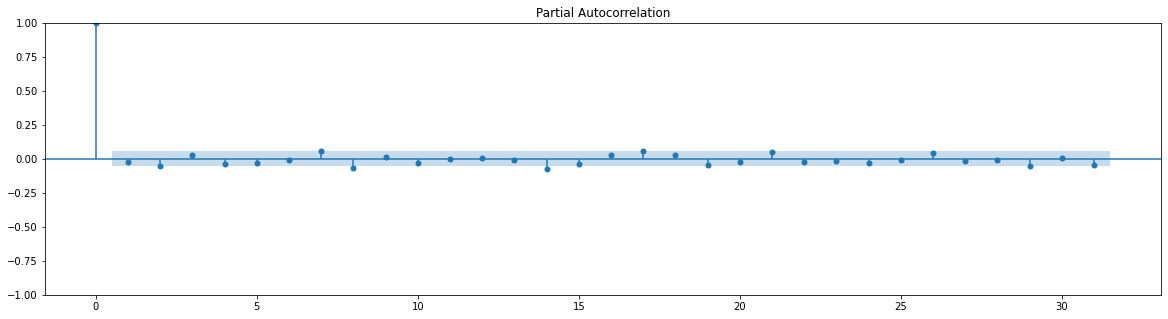

In [55]:
plot_pacf(ts_diff)
plt.show()

In [56]:
## same here no information  from this 

In [57]:
## so in stock data we can't get clear lags with ACF & PACF 